In [26]:
import torch

from car_listing_visual_verification.config import PROCESSED_DATA_FILE, RAW_DATA_DIR

import pandas as pd

In [27]:
df = pd.read_csv(PROCESSED_DATA_FILE)

In [28]:
df

,image_path,class_id,class_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,00001.jpg,14,Audi TTS Coupe 2012,39,116,569,375
1,00002.jpg,3,Acura TL Sedan 2012,36,116,868,587
2,00003.jpg,91,Dodge Dakota Club Cab 2007,85,109,601,381
3,00004.jpg,134,Hyundai Sonata Hybrid Sedan 2012,621,393,1484,1096
4,00005.jpg,106,Ford F-450 Super Duty Crew Cab 2012,14,36,133,99
...,...,...,...,...,...,...,...
8139,08140.jpg,78,Chrysler Town and Country Minivan 2012,3,44,423,336
8140,08141.jpg,196,smart fortwo Convertible 2012,138,150,706,523
8141,08142.jpg,163,Mercedes-Benz SL-Class Coupe 2009,26,246,660,449
8142,08143.jpg,112,Ford GT Coupe 2006,78,526,1489,908


In [29]:
df[df["class_id"] == 1]

,image_path,class_id,class_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
162,00163.jpg,1,AM General Hummer SUV 2000,46,84,661,428
461,00462.jpg,1,AM General Hummer SUV 2000,5,8,83,58
521,00522.jpg,1,AM General Hummer SUV 2000,6,7,94,68
706,00707.jpg,1,AM General Hummer SUV 2000,26,32,677,418
772,00773.jpg,1,AM General Hummer SUV 2000,33,50,197,150
886,00887.jpg,1,AM General Hummer SUV 2000,6,9,124,89
945,00946.jpg,1,AM General Hummer SUV 2000,48,24,441,202
1276,01277.jpg,1,AM General Hummer SUV 2000,1,5,160,89
1660,01661.jpg,1,AM General Hummer SUV 2000,178,214,901,658
1831,01832.jpg,1,AM General Hummer SUV 2000,29,18,157,86


In [30]:
import matplotlib.pyplot as plt

In [31]:
df['class_id'].nunique()

196

<Axes: xlabel='class_id'>

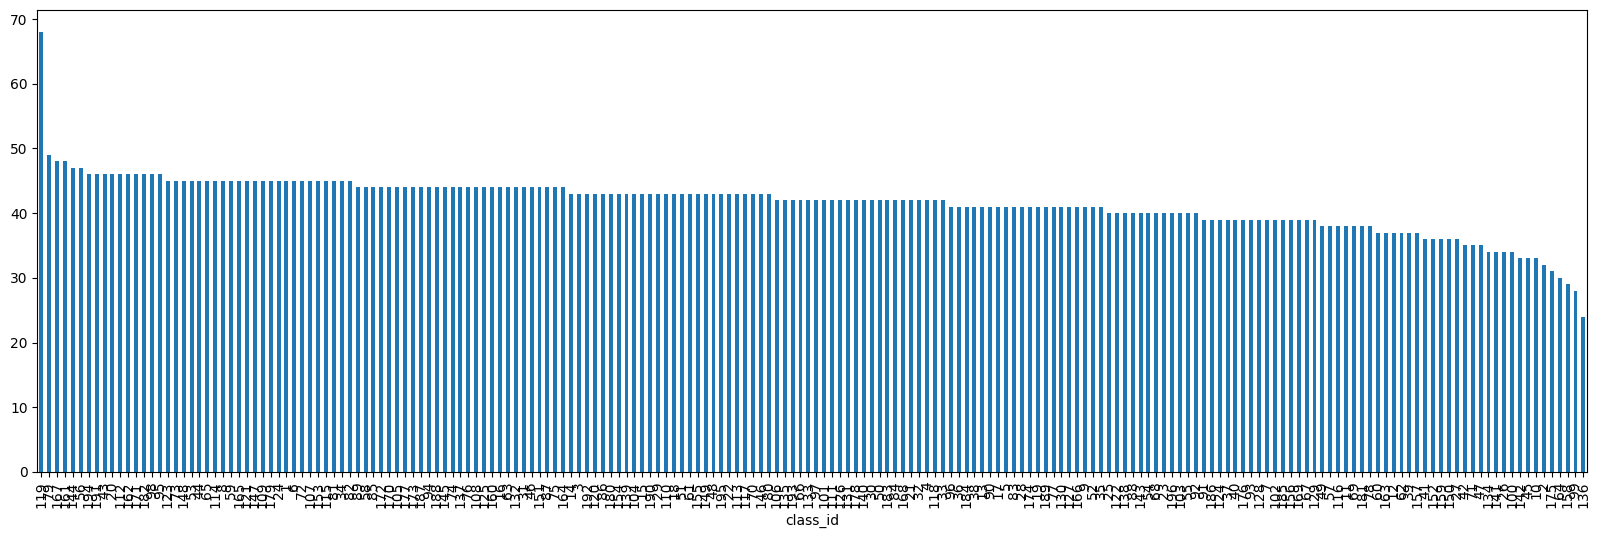

In [32]:
df['class_id'].value_counts().plot(kind='bar', figsize=(20,6))

In [33]:
import os
missing_files = [f for f in df['image_path'] if not os.path.exists(RAW_DATA_DIR / "cars_train/cars_train" / f)]

In [34]:
missing_files

[]

In [35]:
from car_listing_visual_verification import data_loader

stanford_cars = data_loader.StanfordCarsDataset(PROCESSED_DATA_FILE, RAW_DATA_DIR/"cars_train/cars_train")
image, label = stanford_cars.__getitem__(2)

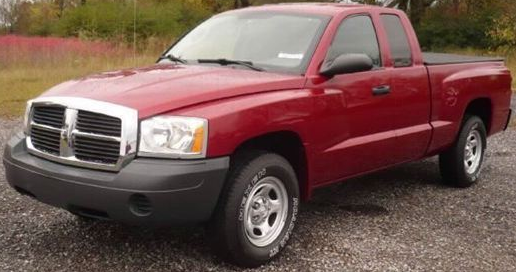

In [36]:
image

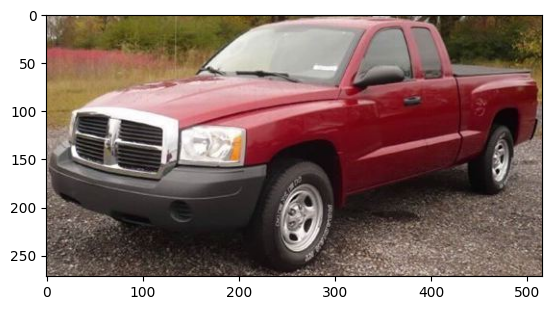

In [37]:
plt.imshow(image)
plt.show()

In [50]:
from torchvision.transforms import transforms
transform = transforms.Compose([
transforms.Resize((244, 244)),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)
])

stan_cars = data_loader.StanfordCarsDataset(PROCESSED_DATA_FILE, RAW_DATA_DIR/"cars_train/cars_train", transform)
img, lbl = stan_cars.__getitem__(2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.64].


<function matplotlib.pyplot.show(close=None, block=None)>

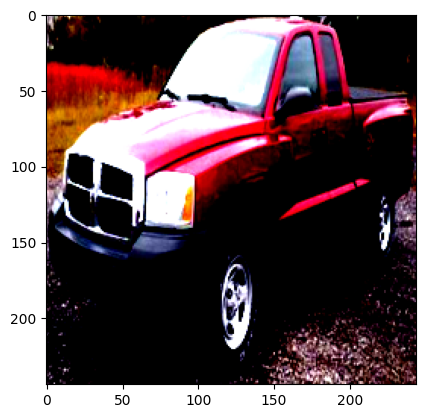

In [58]:
img = torch.permute(img, (1,2,0))
plt.imshow(img)
plt.show